# Estimating Vol

## 3. OHLC

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
sns.set()

etf = yf.Ticker('SPY')
data = etf.history(start='2000-01-01', actions=False)
data.drop(['Volume'], inplace=True, axis=1)

data

,Open,High,Low,Close
Date,,,,
2000-01-03 00:00:00-05:00,95.094272,95.094272,92.287949,93.290207
2000-01-04 00:00:00-05:00,92.067432,92.408200,89.571810,89.641968
2000-01-05 00:00:00-05:00,89.762224,90.784528,88.038341,89.802315
2000-01-06 00:00:00-05:00,89.561741,90.764450,88.359032,88.359032
2000-01-07 00:00:00-05:00,90.002736,93.490593,89.842375,93.490593
...,...,...,...,...
2024-08-27 00:00:00-04:00,559.489990,562.059998,558.320007,561.559998
2024-08-28 00:00:00-04:00,561.210022,561.650024,555.039978,558.299988
2024-08-29 00:00:00-04:00,560.309998,563.679993,557.179993,558.349976


In [3]:
# 1 month
param = 20 

### Parkinson (1980)

In [4]:
# Parkinson Vol
vol_p = np.sqrt(252 / (4 * param * np.log(2)) * pd.DataFrame.rolling(np.log(data['High'] / data['Low']) ** 2, 20).sum())

In [5]:
vol_p

Date
2000-01-03 00:00:00-05:00         NaN
2000-01-04 00:00:00-05:00         NaN
2000-01-05 00:00:00-05:00         NaN
2000-01-06 00:00:00-05:00         NaN
2000-01-07 00:00:00-05:00         NaN
                               ...   
2024-08-27 00:00:00-04:00    0.144728
2024-08-28 00:00:00-04:00    0.145113
2024-08-29 00:00:00-04:00    0.134349
2024-08-30 00:00:00-04:00    0.132828
2024-09-03 00:00:00-04:00    0.128471
Length: 6206, dtype: float64

Text(0.5, 1.0, 'Parkinson Volatility')

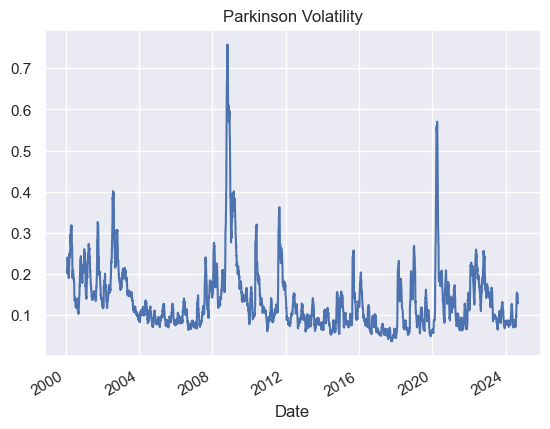

In [6]:
vol_p.plot()
plt.title('Parkinson Volatility')

### Garman-Klass (1980) 

In [7]:
term1 = 0.5 * pd.DataFrame.rolling(np.log(data['High'] / data['Low']) ** 2, param).sum()
term2 = (2 * np.log(2) - 1) * pd.DataFrame.rolling(np.log(data['Close'] / data['Open']) ** 2, param).sum()
vol_gk = np.sqrt((252 / param) * (term1 - term2))
vol_gk

Date
2000-01-03 00:00:00-05:00         NaN
2000-01-04 00:00:00-05:00         NaN
2000-01-05 00:00:00-05:00         NaN
2000-01-06 00:00:00-05:00         NaN
2000-01-07 00:00:00-05:00         NaN
                               ...   
2024-08-27 00:00:00-04:00    0.147576
2024-08-28 00:00:00-04:00    0.147836
2024-08-29 00:00:00-04:00    0.138233
2024-08-30 00:00:00-04:00    0.136210
2024-09-03 00:00:00-04:00    0.128347
Length: 6206, dtype: float64

Text(0.5, 1.0, 'Garman-Klass Volatility')

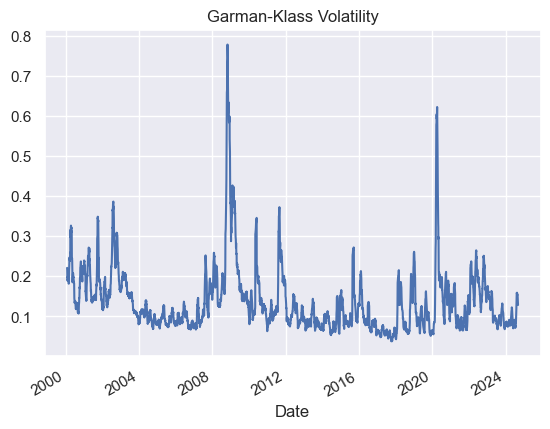

In [8]:
vol_gk.plot()
plt.title('Garman-Klass Volatility')

### Rogers-Satchell (1991)

In [9]:
term1 = np.log(data['High'] / data['Close']) * np.log(data['High'] / data['Open']) + np.log(data['Low'] / data['Close']) * np.log(data['Low'] / data['Open'])
vol_rs = np.sqrt((252 / param) * pd.DataFrame.rolling(term1, param).sum())
vol_rs

Date
2000-01-03 00:00:00-05:00         NaN
2000-01-04 00:00:00-05:00         NaN
2000-01-05 00:00:00-05:00         NaN
2000-01-06 00:00:00-05:00         NaN
2000-01-07 00:00:00-05:00         NaN
                               ...   
2024-08-27 00:00:00-04:00    0.148170
2024-08-28 00:00:00-04:00    0.148784
2024-08-29 00:00:00-04:00    0.140946
2024-08-30 00:00:00-04:00    0.138915
2024-09-03 00:00:00-04:00    0.128978
Length: 6206, dtype: float64

Text(0.5, 1.0, 'Rogers-Satchell Volatility')

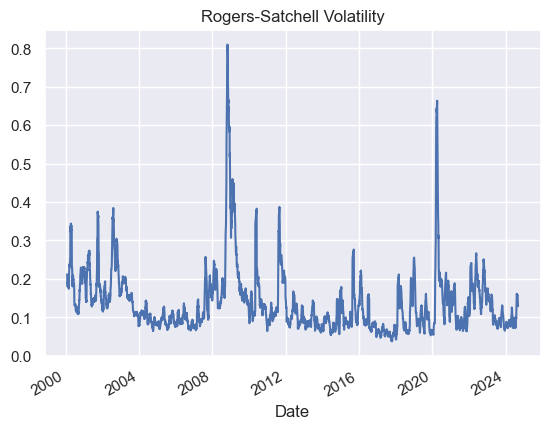

In [10]:
vol_rs.plot()
plt.title('Rogers-Satchell Volatility')

### Yang-Zhang (2000) 

In [13]:
# YZ's param
alpha = 1.34
kappa = (alpha - 1) / (alpha + ((param + 1) / (param - 1)))

# Overnight vol
vol_o = np.log(data['Open'] / data['Close'].shift())

# intramarket vol
vol_c = np.log(data['Close'] / data['Open'])

vol_yz = np.sqrt(vol_o ** 2 + kappa * vol_c ** 2 + (1 - kappa) * vol_rs ** 2)
vol_yz

Date
2000-01-03 00:00:00-05:00         NaN
2000-01-04 00:00:00-05:00         NaN
2000-01-05 00:00:00-05:00         NaN
2000-01-06 00:00:00-05:00         NaN
2000-01-07 00:00:00-05:00         NaN
                               ...   
2024-08-27 00:00:00-04:00    0.137510
2024-08-28 00:00:00-04:00    0.138068
2024-08-29 00:00:00-04:00    0.130837
2024-08-30 00:00:00-04:00    0.128983
2024-09-03 00:00:00-04:00    0.119944
Length: 6206, dtype: float64

Text(0.5, 1.0, 'Yang-Zhang Volatility')

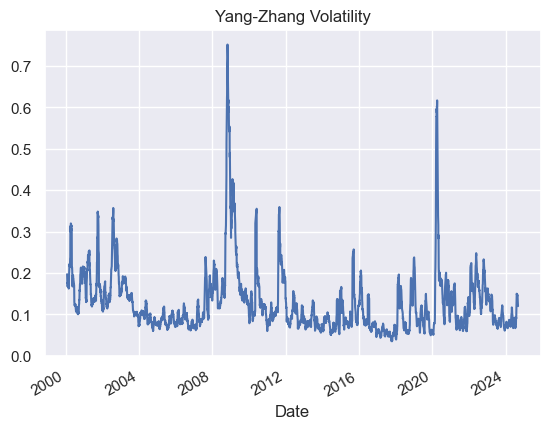

In [14]:
vol_yz.plot()
plt.title('Yang-Zhang Volatility')

## Model Comparison

Text(0, 0.5, 'Volatility')

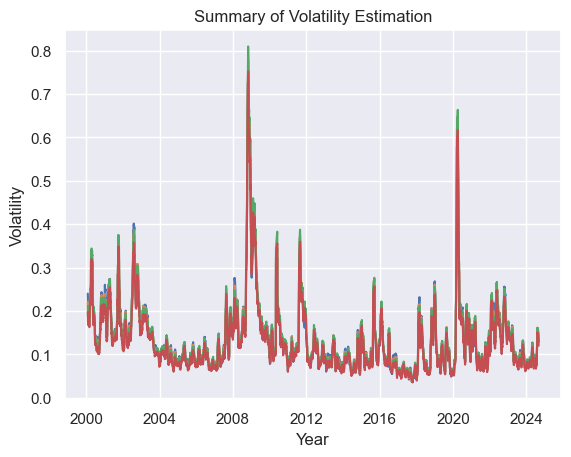

In [15]:
plt.plot(vol_p)
plt.plot(vol_gk)
plt.plot(vol_rs)
plt.plot(vol_yz)

plt.title('Summary of Volatility Estimation')
plt.xlabel('Year')
plt.ylabel('Volatility')

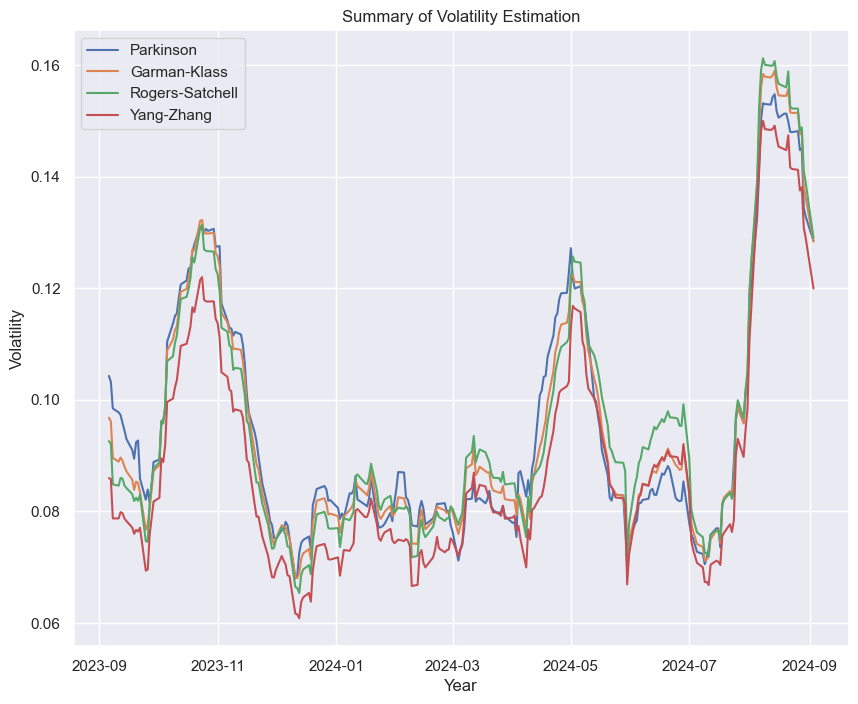

In [16]:
plt.figure(figsize=(10, 8))
plt.plot(vol_p.iloc[-250:], label='Parkinson')
plt.plot(vol_gk.iloc[-250:], label='Garman-Klass')
plt.plot(vol_rs.iloc[-250:], label='Rogers-Satchell')
plt.plot(vol_yz.iloc[-250:], label='Yang-Zhang')

plt.title('Summary of Volatility Estimation')
plt.xlabel('Year')
plt.ylabel('Volatility')
plt.legend(loc='upper left')